# [이론3] 얕은 신경망, 소프트맥스, 손실 함수


---

## 학습 목표

- 신경망의 기본 구조를 이해한다.
- 손실 함수를 이용한 학습 방법을 이해한다.
- 소프트맥스 함수의 확률적 특성을 이해한다.


---

## 목차

### [이론3] 얕은 신경망, 소프트맥스, 손실 함수

1. 얕은 신경망(Shallow Neural Network)
1. 소프트맥스(Softmax)와 항등함수
1. 손실 함수


---

## [이론3] 얕은 신경망, 소프트맥스, 손실함수

### 1. 얕은 신경망(Shallow Neural Network)

#### 간단한 신경망의 구성

간단한 신경망의 구성은 다음과 같습니다.     
입력층으로 들어온 신호들이 은닉층을 통해서 출력층으로 나가게 됩니다.     
이때 입력층으로 들어오는 신호들의 개수와 첫 번째 은닉층의 노드의 개수를 곱한 크기만큼의 변수의 개수가 $W_{0}$에 할당됩니다.   


<center>
<img src="img/1-3-1.png" width="40%" height="40%"></img>
<!-- <img src="https://github.com/MLBasic/EllisMLI/raw/master/L1_3/img/1-3-1.png" width="50%" height="50%"></img> -->
</center>

우선 입력층에서 은닉층으로 넘어가는 과정만 살펴보겠습니다.     
여기에 사용되는 변수는 $W_0$와 $b_0$입니다.

##### 신경망 수식

>$$
V_{0(0)} = W_{0(0,0)} x_0 + W_{0(0,1)} x_1 + W_{0(0,2)} x_2 + b_{0(0)} \\
V_{0(1)} = W_{0(1,0)} x_0 + W_{0(1,1)} x_1 + W_{0(1,2)} x_2 + b_{0(1)} \\
V_{0(2)} = W_{0(2,0)} x_0 + W_{0(2,1)} x_1 + W_{0(1,1)} x_2 + b_{0(2)} 
$$

위를 행렬식으로 표현하면 다음과 같습니다.

>$$
\begin{bmatrix}
V_{0(0)} \\
V_{0(1)} \\
V_{0(2)} 
\end{bmatrix}
=
\begin{bmatrix}
W_{0(0,0)} & W_{0(0,1)} & W_{0(0,2)}\\
W_{0(1,0)} & W_{0(1,1)} & W_{0(1,2)}\\
W_{0(2,0)} & W_{0(2,1)} & W_{0(2,2)}
\end{bmatrix}
\begin{bmatrix}
x_{0} \\
x_{1} \\
x_{2} 
\end{bmatrix}
+
\begin{bmatrix}
b_{0(0)} \\
b_{0(1)} \\
b_{0(2)} 
\end{bmatrix}
\\[30pt]
$$

>$$
V_0 = W_0 X + b_0
$$





프로그래밍을 위해 행과 열을 바꾸면 다음과 같습니다.


>$$
\begin{bmatrix}
V_{0(0)} \;\; V_{0(1)} \;\; V_{0(2)} 
\end{bmatrix}
=
\begin{bmatrix}
x_{0}  \;\; x_{1}  \;\; x_{2} 
\end{bmatrix}
\begin{bmatrix}
W_{0(0,0)} & W_{0(1,0)} & W_{0(2,0)}\\
W_{0(0,1)} & W_{0(1,1)} & W_{0(2,1)}\\
W_{0(0,2)} & W_{0(1,2)} & W_{0(2,2)}
\end{bmatrix}
+
\begin{bmatrix}
b_{0(0)} \;\; b_{0(1)} \;\; b_{0(2)} 
\end{bmatrix}
\\[30pt]
$$

>$$
V_0^T = X^T \cdot W_0^T + b_0^T
$$

편의상 전치행렬의 T를 제거하고 다음과 같이 쓰기로 합니다.

>$$
V_0 = X \cdot W_0 + b_0
$$


은닉층 노드에 들어온 값은 다시 활성 함수를 거치면서 변환(transform)됩니다. 이렇게 변환된 값이 다시 $w_1$, $b_1$과 선형결합되어 출력층에 도달하게 됩니다.   

>$$
V_0 = X \cdot W_0 + b_0  \\[10pt]
H_0 = f(V_0) \\[10pt]
Y   = H_0 \cdot W_1 + b_1  \\[10pt]
$$




신경망 출력층의 노드 숫자는 분류하고 싶은 클래스로 설정하는 것이 일반적입니다.   
irsi 데이터 세트를 사용해서 3종류의 붓 꽂은 분류하는 신경망을 만든다면 출력층에 3개의 노드를 두면 됩니다.   
MNIST 데이터 세트를 사용해서 10종류의 숫자를 분류하는 신경망이라면 10개의 노드를 가진 신경망을 만들면 됩니다.   

입력 노드의 수는 들어오는 신호의 크기와 같이하고 출력 노드의 수는 분류하고 싶은 클래스의 숫자로 설정합니다.

10개 혹은 3개의 출력 노드를 둔다면 이때 개별 노드에 들어오는 출력값을 시그모이드나 ReLU와는 다른 소프트맥스(Softmax)라는 출력 전용 활성 함수를 사용합니다.   
소프트맥스는 활성 함수이지만 마지막 출력 단계에서만 사용됩니다. 은닉층에서는 사용되지 않습니다.



#### 3층 신경망의 구성



<center>
<img src="img/1-3-2.png" width="60%"></img>
<!-- <img src="https://github.com/MLBasic/EllisMLI/raw/master/L1_3/img/1-3-2.png" width="60%" height="60%"></img> -->
</center> 




3층 신경망은 얕은 신경망에서 은닉층이 하나 더 늘어난 형태입니다.   
3층 신경망의 구조는 다음과 같습니다.   
`f()`는 ReLU등의 활성 함수이고, `g()`는 항등함수 혹은 소프트맥스 함수입니다.   
앞에서 시작해서 뒤로 순차적으로 전진해 나가는 과정이므로 '순 전파'라고 부릅니다.    

>$$
\begin{aligned}
&Step \; 1 : V_0 = X \cdot W_0 + b_0  \\[10pt]
&Step \; 2 : H_0 = f(V_0) \\[10pt]
&Step \; 3 : V_1 = H_0 \cdot W_1 + b_1  \\[10pt]
&Step \; 4 : H_1 = f(V_1) \\[10pt]
&Step \; 5 : V_1 = H_1 \cdot W_2 + b_2  \\[10pt]
&Step \; 6 : Y   = g(V_1) \\[10pt]
\end{aligned}
$$


#### 변수의 크기

변수 W의 크기는 입력 노드와 출력 노드의 개수를 곱한 것과 같고, 변수 b의 크기는 출력 노드의 개수와 같습니다.     
$W_0$의 크기는 2 $\cdot$ 3인 6이 되고, $b_0$의 크기는 3입니다.

#### 3층 신경망 구현

지금까지 학습한 내용을 기반으로 간단한 3층 신경망을 구현해 보겠습니다.     
입력층부터 출력층까지 순서대로 흘러가는 구조를 프로그래밍해 보겠습니다.

`init_bw()` 함수는 `입력층, 은닉층 1, 은닉층 2, 출력층`의 4개 값의 가지고 W와 b를 랜덤한 숫자로 초기화합니다. 

In [1]:
import numpy as np

def init_bw(layer_x, layer_h0, layer_h1, layer_y):   # [입력층, 은닉층1, 은닉층2, 출력층] 노드의 숫자
    matrix_nn = {}    # {'B0':[0,0,0,...], 'B1':[...], 'B2':[...] ,
                      #  'W0':[[0,0,0...],[0,0,0...],...], 'W1':[[..],[..],..], 'W2':[[..],[..],..]}
    matrix_nn = dict(B0=np.random.rand(layer_h0), 
                     B1=np.random.rand(layer_h1), 
                     B2=np.random.rand(layer_y),
                     W0=np.random.rand(layer_x,layer_h0), 
                     W1=np.random.rand(layer_h0,layer_h1), 
                     W2=np.random.rand(layer_h1,layer_y))    
    return matrix_nn 


신경망에서 사용할 활성 함수인 시그모이드와 ReLU입니다.

In [3]:
# 활성 함수
def sigmoid(x):
    return 1 / (1+np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def relu_if(x):
    if x <=0:
        h = 0
    else:
        h = x
    return h

x = -3
print('relu_if(x):', relu_if(x))

relu_if(x): 0


`forward()`함수는 초기화된 W, b 값과 입력값인 x를 이용해서 출력 y를 만듭니다.

In [3]:
def forward(nn, x, actFunc):
    b0, b1, b2 = nn['B0'], nn['B1'], nn['B2']
    W0, W1, W2 = nn['W0'], nn['W1'], nn['W2']

    V0 = np.dot(x, W0) + b0
    H0 = actFunc(V0)
    V1 = np.dot(H0, W1) + b1
    H1 = actFunc(V1)
    Y = np.dot(H1, W2) + b2
    
    Y = V2

    return Y 


활성 함수 중 `relu`를 사용해서 3층 신경망을 순서대로 작동 시켜 보겠습니다.    
아래에서 `relu`대신 `sigmoid`를 사용할 수 있습니다.

In [4]:
x = np.array([7.0, 2.5])

nn = init_bw(2, 3, 3, 2)
y_nn = forward(nn, x, sigmoid)

print(y_nn)

[1.68500599 1.28370403]


#### 텐서플로를 이용한 신경망 구성

신경망을 이해하기 위해 기초적인 코드를 짧게 구성해 보았습니다.    
실무에서 신경망을 사용할 때는 위에서 만드는 것처럼 직접 코드를 만들어서 사용하지는 않습니다.
기본적으로 이미 잘 만들어져 있는 머신 러닝용 라이브러리를 사용하게 됩니다.

여기서는 텐서플로를 사용한 간단한 신경망을 구성해 보겠습니다.    
입력층과 출력층 외에 두 개의 은닉층을 가지도록 신경망을 구성하겠습니다.
입력으로 들어오는 것은 MNIST 데이터 세트로 28x28 크기의 이미지 파일 6만 장과 1만 장으로 이루어진 손글씨 숫자 데이터입니다.


In [5]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


텐서플로에서 mnist 데이터 세트를 가져왔습니다.

In [6]:
x_train, x_test = x_train / 255.0, x_test / 255.0

MNIST 이미지는 0에서 255사이의 정수로 되어 있습니다. 이것을 255로 나누어 0에서 1사이의 실수로 변환합니다.

In [7]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
]) 

`Sequential()`을 사용해서 모델의 만들어 줍니다. 모델 안에 들어가는 순서를 보면 다음과 같습니다.

- Flatten(input_shape=(28, 28) : 28x28 크기의 평면의 점으로 만들어진 사진을 784개의 일차원 직선 점 집합으로 변환합니다.
- Dense(64, activation='relu') : 위의 과정을 통과한 후 64개 노드로 구성된 은닉층으로 들어갑니다. 은닉층의 활성 함수는 ReLU입니다.
- Dense(64, activation='relu') : 위의 과정을 통과한 후 다시 한번 32개 노드로 구성된 은닉층으로 들어갑니다. 은닉층의 활성 함수는 ReLU입니다.
- Dense(10, activation='softmax') : 위의 과정을 통과한 후 노드가 10개인 출력층으로 갑니다. 이때의 활성 함수는 softmax입니다.

소프트맥스에 대해서는 아래에서 학습합니다.    
`Dense(64, activation='relu')`안에 784*64개의 W값과 64개의 b 값에 대한 정보가 존재하고, `XW+b` 이후에 활성 함수 `f()`의 적용까지 포함됩니다.


모델 구조를 파악하기 위해서 `model.summary()` 명령을 사용할 수 있습니다.

신경망의 구조를 한 눈에 파악할 수 있습니다.

In [8]:
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


모델을 컴파일합니다.    

컴파일은 모델 학습을 진행하기 위해 필요한 신경망과 최적화 방법을 최종적으로 결정하는 단계입니다.    
컴파일하면서 선택된 손실 함수와 최적화 방법이 결정됩니다. 손실 함수로는 `sparse_categorical_crossentropy`, 최적화 방법으로는 `adam`를 선택하고, 측정항목을 `metrics`에 넣습니다.   
`adam` 최적화 방법은 2단원에서 자세히 다룹니다. 


텐서플로를 사용하는 기본적인 흐름은 다음과 같습니다.

1. 모델 생성 : 
      - `Sequential()`을 이용하여 입력 노드, 출력 노드, 은닉 노드의 형태와 개수를 결정하고 활성 함수를 선택합니다.
      
      
2. 모델 컴파일(compile) :
      - 생성된 모델의 최적화 방법(`SGD`, `adam` 등)과 손실 함수 등을 결정합니다.
      
      
3. 훈련(fit) :
      - 훈련 데이터와 훈련 회수를 넣어 신경망을 훈련합니다.

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5240 - accuracy: 0.8494
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1409 - accuracy: 0.9586
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0980 - accuracy: 0.9698
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0706 - accuracy: 0.9789
Epoch 5/5
313/313 [==============================] - 0s 983us/step - loss: 0.0923 - accuracy: 0.9717


[0.0923105850815773, 0.9717000126838684]

만들어진 모델을 컴파일하고(compile), 훈련합니다(fit). 
<br>훈련이 마쳐진 신경망이 제대로 작동하는 훈련 과정에 포함하지 않았던 검증용 데이터를 이용하여 검증합니다(evaluate).

1 epoch은 전체 데이터를 모두 사용하는 양을 의미합니다. 즉, 6만 장의 사진으로 학습을 한다면 6만 장의 사진을 모두 한번 사용한 것을 1 epoch라고 합니다.    
총 5 epoch 동안 학습이 진행되었고, 손실 값은 1회에서는 0.3 정도였던 값이 5회째에는 0.1 이하로 내려가는 것을 확인할 수 있습니다. accuracy는 0.97 정도가 나오고 있습니다. 

### 2. 소프트맥스(Softmax)와 항등함수

#### 출력층의 활성 함수

신경망의 출력층은 분류 문제를 다룰 때는 소프트맥스 함수를, 회귀 문제를 다룰 때는 항등함수를 사용합니다.    
회귀(regression) 문제는 연속적인 신호에 대해 결과를 예측하는 문제입니다. 회귀의 경우 출력층에서 별도의 활성 함수를 사용하지 않고 항등함수를 사용합니다.

##### 항등함수 
>$$
f(x) = x
$$

분류(classification) 문제는 개별 클래스에 속할 확률을 구하는 문제입니다. 그래서 최종적으로 나온 값을 다시 확률값으로 변환시키는 과정이 포함됩니다.    
여기에 사용되는 활성 함수는 소프트맥스(softmax)입니다.

##### 소프트맥스 함수 
>$$ 
f(x_k)=\frac {e^{(x_k)}} {\sum_{i=1}^{N} \; e^{(x_i)} } \\
$$


#### 항등함수



항등함수는 입력을 그대로 출력하는 함수입니다. 

In [ ]:
def identity_function(x):
    return x
    

In [ ]:
x = np.array([7.0, 0.1, 2.5])
y = identity_function(x)
print(y)

[7.  0.1 2.5]


#### 비례 확률 함수   

출력층에 들어온 값을 확률값으로 만든다면 가장 먼저 생각할 수 있는 것은 비례식으로 확률값을 만드는 방법입니다.     
다음과 같은 함수를 생각할 수 있습니다.

##### 비례 확률 함수 
>$$ 
\begin{aligned}
f(x_k)  &= \frac {x_k} {\sum_{all} \; x_i } \\
        &= \frac {x_k} { x_1 +  x_2 +  x_3 + ... +  x_n } \\
\end{aligned}
$$


In [ ]:
def prop_function(x):
    return (x/np.sum(x))


In [ ]:
x = np.array([1,1,3])
y = prop_function(x)

print('y = ', y)
print('Sum of y = ', np.sum(y))

y =  [0.2 0.2 0.6]
Sum of y =  1.0


#### 소프트맥스 

비례 확률 함수는 실제로 사용되는 활성 함수는 아닙니다. 입력값은 비례로 계산하여 확률로 만들 수 있지만, 그보다 더 나은 활성 함수가 있습니다.    
소프트맥스는 들어온 입력값을 지수함수로 만든 다음 비례로 처리해서 확률값을 만들어 줍니다.

##### 소프트맥스 함수 
>$$ 
\begin{aligned}
f(x_k) &= \frac {e^{(x_k)}} {\sum_{i=1}^{N} \; e^{(x_i)} } \\[10pt]
       &= \frac {e^{x_k}} { e^{x_1} + e^{x_2} + e^{x_3} + ... + e^{x_n} } \\
\end{aligned}
$$


In [ ]:
def softmax(x):
    x = x - np.max(x)
    return (np.exp(x) / np.sum(np.exp(x)))

In [ ]:
x = np.array([1,1,3])
y = softmax(x)

print('y = ', y)
print('Sum of y = ', np.sum(y))

y =  [0.10650698 0.10650698 0.78698604]
Sum of y =  1.0


`[1, 1, 3]`의 입력이 비례 확률 함수에서는 `[0.2, 0.2, 0.6]`으로 출력되었지만, 소프트맥스에서는 `[0.11, 0.11, 0.78]`로 출력되었습니다.    
소프트맥스는 큰 값은 더 큰 비중을 주고, 작은 값은 더 작은 비중을 가지게 합니다. 이런 특징은 지수 함수 $f(x) = e^x$의 특징을 그대로 계승합니다.    
`[1, 1, 3]`을 지수함수에 넣어보면 다음과 같습니다.

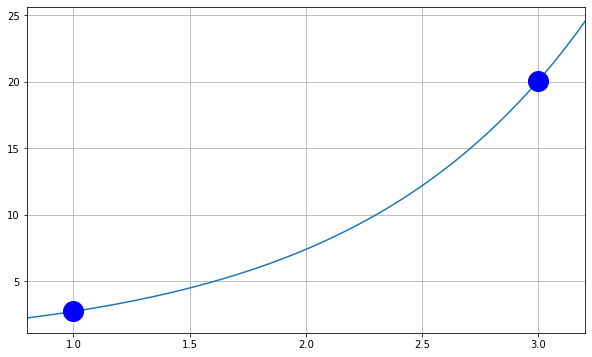

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

x = np.arange(0.8, 3.2, 0.01)
y = np.exp(x)
plt.xlim(0.8,3.2)
plt.grid()
plt.plot(x,y)
plt.plot([1, 3],[np.exp(1),np.exp(3)], 'bo', markersize=20)
plt.show()

In [ ]:
x = np.array([1,1,3])
y = np.exp(x)

print('x =', x,'\nexp(x) =', y)

x = [1 1 3] 
exp(x) = [ 2.71828183  2.71828183 20.08553692]


입력 `[1, 1, 3]`은 지수 함수를 거치면 상대적으로 작은 값인 `1`은 `2.72`가 되고, 상대적으로 큰 값인 `3`은 `20.09`가 됩니다.
이제 이 값을 이용해서 다시 비례 확률 함수를 사용하면 다음과 같습니다.



In [ ]:
x = np.array([1,1,3])
h = np.exp(x)
y = prop_function(h)

print('y = ', y)
print('Sum of y = ', np.sum(y))

y =  [0.10650698 0.10650698 0.78698604]
Sum of y =  1.0


이 결과는 소프트맥스와 동일합니다. 소프트맥스는 지수함수를 통과한 결과를 비례 확률로 계산한 것입니다.

In [ ]:
x = np.array([1,1,3])
y = softmax(x)

print('y = ', y)
print('Sum of y = ', np.sum(y))

y =  [0.10650698 0.10650698 0.78698604]
Sum of y =  1.0


### 3. 손실 함수


#### 손실 함수란?

만들어진 신경망의 성능을 평가해야 합니다. 개선 중인 신경망의 현재 상태를 표시하는 지표가 필요합니다.   
일반적으로 신경망의 성능을 표시하는 지표로 두 가지가 있습니다. 첫 번째는 정확도(accuracy)이고, 두 번째는 손실 정도(loss value)입니다.

**정확도**는 얼마나 정확하게 값을 예측하는가를 의미합니다.     
100장의 사진 속 글씨를 예측했을 때 90장을 맞췄다면 정확도는 90%가 됩니다.    
이때는 사진 속 글씨가 1일 확률이 51%거나 혹은 99%거나 상관없습니다. 심지어 1일 확률이 19%이고, 나머지가 9%일 수도 있습니다. 모두 정확도로 계산하면 같은 결과가 나옵니다. 
즉, 51%의 확률값으로 90장의 사진을 맞췄을 때와 99%의 확률값으로 90장의 맞췄을 때 같은 정확도를 보인다고 말할 수 있습니다.

**손실 정도**는 최종 결과에서 확률값이 얼마나 정답에 가까운지를 나타냅니다.     
예를 들어 0에서 9까지의 10개의 확률값이 신경망을 거치면서 나오게 됩니다. 1일 확률값이 51%인 경우와 99%인 경우에 대해서 살펴봅시다.
정답은 1이라면 두 경우 모두 정답을 맞혔기 때문에 같은 정확도를 보이게 됩니다. 하지만 정답은 1일 확률이 100%여야 하는데 실제 신경망을 통해 나온 결과가 51%라면 여기서 49%P만큼 정답과 신경망의 결과가 차이가 있음을 알 수 있습니다. 이 차이를 '손실(loss)' 값으로 하고 손실 값을 작게 만드는 방향으로 기계 학습을 진행합니다. 


정확도는 쉽게 변하지 않는 지표이고, 그래서 정확도를 이용한 학습은 한계가 있습니다. 그래서 보편적으로 기계 학습에서는 정확도 대신 손실 정도를 이용한 학습이 진행됩니다. 




#### 평균 제곱 오차(MSE, Mean Squared Error)

많이 쓰이는 오차 함수로 평균 제곱 오차가 있습니다.    
평균 제곱 오차의 수식은 다음과 같습니다.


##### 평균 제곱 오차 수식

> $$
E = { 1 \over N } \sum_{i=1}^{N} \; (y_i -t_i)^2
$$

$y_i$는 신경망의 출력이고, $t_i$는 정답 레이블입니다. 예를 들어 3종의 품종을 가진 iris 데이터를 이용한 신경망 출력 결과가 소프트맥스를 통과한 후 다음과 같다고 가정하겠습니다.    

>$$
y = [0.08, \;\; 0.54, \;\; 0.38]   \\
t = [0.00, \;\; 1.00, \;\; 0.00]
$$



위의 경우에 대한 평균 제곱 오차를 구해보겠습니다.     
평균 제곱 오차 함수는 다음과 같습니다. 

In [ ]:
def mse(t, y):
    return np.sum((y-t)**2) / len(y)
    

위에서 만든 mse() 함수 대신 텐서플로에 내장되어 있는 `MeanSquaredError()` 함수를 사용할 수 있습니다.

In [ ]:
import tensorflow as tf

tf_mse = tf.keras.losses.MeanSquaredError()


mse() 와 tf_mse() 를 사용해 같은 결과가 나오는지 확인해 보겠습니다.

In [ ]:
y = np.array([0.08, 0.54, 0.38])
t = np.array([0.00, 1.00, 0.00])

print('MSE =', mse(t,y))
print('TF.MSE =', tf_mse(t, y).numpy())


MSE = 0.12079999999999998
TF.MSE = 0.12080000340938568


#### 교차 엔트로피 오차

일반적으로 많이 사용되는 평균 제곱 오차와 함께 신경망에서 많이 사용되는 교차 엔트로피 오차(Cross Entropy Error)가 있습니다.    
교차 엔트로피 오차의 수식은 다음과 같습니다.

##### 교차 엔트로피 오차 수식

> $$
E = -  \sum_{i=1}^{N} \; t_i \log y_i
$$


교차 엔트로피 오차 수식의 `log`는 밑이 `e`인 자연로그입니다.   
정답 레이블인 $t_i$는 [0, 1, 0, 0, 0, 0]처럼 하나의 값만 1이고, 나머지는 0입니다. 교차 엔트로피 오차 E의 값은 신경망을 통과한 값 중 정답과 관계없는 값들은 모두 무시되고, 정답과 같은 위치로 나온 값만이 log를 취한 후 부호가 반전되어 만들어집니다.



In [ ]:
# 교차 엔트로피 오차

y = np.array([0.08, 0.54, 0.38])
t = np.array([0, 1, 0])

E = - (t[0]*np.log(y[0]) + t[1]*np.log(y[1]) + t[2]*np.log(y[2]))
print(E)

0.616186139423817


인덱스 0번과 2번의 정답 레이블에 있는 값이 0이므로 첫 번째와 세 번째 항을 제거해도 같은 결과가 나옵니다.

In [ ]:
E = - (t[1]*np.log(y[1]))
print(E)

0.616186139423817


교차 엔트로피 오차 함수는 다음과 같이 만들 수 있습니다.   
`log` 함수는 `0`에서 `-inf` 값을 가지므로 입력이 `0`이 들어오더라도 `1e-5(=0.00001)` 정도의 작은 값을 가지도록 보정해 줍니다.

In [ ]:
def cee(t, y):
    h = 1e-5
    return -np.sum(t*np.log(y+h))


In [ ]:
y = np.array([0.08, 0.54, 0.38])
t = np.array([0, 1, 0])

result = cee(t,y)
print(result)

0.6161676210767641


교차 엔트로피 오차를 이해하기 위해 `-log(x)` 그래프를 그려보겠습니다.


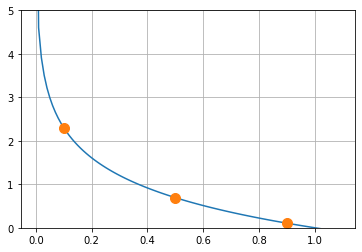

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

h = 1e-5
x = np.arange(0, 1.1,0.01)
y = -np.log(x+h)
plt.ylim(0,5)

plt.plot(x,y)
plt.plot([0.1, 0.5, 0.9],[-np.log(0.1+h),-np.log(0.5+h),-np.log(0.9+h)], 'o', markersize=10)
plt.grid()
plt.show()


0부터 1.0까지 0.2 간격으로 입력값에 따른 교차 엔트로피 오차의 값 `-log(x)`의 값은 다음과 같습니다.

In [ ]:
x = np.arange(0,1.1,0.1)
x = x + 1e-5
y = -np.log(x)

print('x =', np.round_(x,4))
print('y =', np.round_(y,3))

x = [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
y = [11.513  2.302  1.609  1.204  0.916  0.693  0.511  0.357  0.223  0.105
 -0.   ]


위의 결과를 해석하면 다음과 같습니다.

- 정답에 접근하지 못했을 때 손실 값 : 11.513 (ex, $y_1$=0, $t_1$=1 일 때)
- 정답 확률이 10%일 때 손실 값 : 2.302 (ex, $y_1$=0.1, $t_1$=1 일 때)
- 정답 확률이 50%일 때 손실 값 : 0.693 (ex, $y_1$=0.5, $t_1$=1 일 때)
- 정답 확률이 90%일 때 손실 값 : 0.105 (ex, $y_1$=0.9, $t_1$=1 일 때)

학습은 W와 b 값을 변화시키며 진행됩니다.     
매번 학습이 진행될 때마다 신경망은 '손실' 값을 측정하고 손실 값이 작아지는 방향으로 학습을 진행하게 됩니다.

---

<span style="color:rgb(120, 120, 120)">본 학습 자료를 포함한 사이트 내 모든 자료의 저작권은 엘리스에 있으며 외부로의 무단 복제, 배포 및 전송을 불허합니다.

Copyright @ elice all rights reserved</span>